In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes
# First load the data to get the column names
df = pd.read_csv('defunciones.csv')

# Get a list of all column names
cols = df.columns.tolist()

# Create a dictionary with all columns set to str
col_types = {col: str for col in cols}

# Set 'Añoreg' to int
col_types['Añoreg'] = int
col_types['Edadif'] = int

# Reload the data with the correct dtypes
defunciones = pd.read_csv('defunciones.csv', dtype=col_types)

defunciones = defunciones[['Depocu', 'Mupocu', 'Sexo', 'Añoreg', 'Edadif', 'Perdif', 'Puedif', 'Escodif', 'Ciuodif', 'Caudef', 'Asist', 'Ocur']]

defunciones = defunciones.rename(columns={'Depocu': 'departamento', 'Mupocu': 'municipio', 'Sexo': 'sexo', 'Añoreg': 'año_registrado', 'Edadif': 'edad', 'Perdif': 'periodo', 'Puedif': 'etnia', 'Escodif': 'escolaridad', 'Ciuodif': 'ocupacion', 'Caudef': 'causa', 'Asist': 'asistencia', 'Ocur': 'lugar'})

# Order by year 
defunciones = defunciones.sort_values(by='año_registrado')

# Save the cleaned dataframe to a csv file
defunciones.to_csv('defunciones_clean.csv', index=False)

# convert floats to strings since they are categorical (except for año), remove leading and trailing whitespaces, and put most important categories first
for column in defunciones.columns:
    if column != 'año_registrado' and column != 'edad':
        defunciones[column] = defunciones[column].astype(str).str.strip()
        defunciones[column] = defunciones[column].astype('category')



/var/folders/g7/1ym58dj93f13x5_nxk6zr72m0000gn/T/ipykernel_47666/1586653056.py:7: DtypeWarning: Columns (15,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('defunciones.csv')


Las 10 causas de muerte más frecuentes:
                                               causa  count
0  Infarto agudo del miocardio, sin otra especifi...  66161
1                          Neumonía, no especificada  45541
2                              Muerte sin asistencia  34582
3  Diabetes mellitus no especificada, sin mención...  34318
4  Otras causas mal definidas y las no especifica...  27258
5   Otras cirrosis del hígado y las no especificadas  25998
6  Exposición a factores no especificados que cau...  25720
7                       COVID-19, virus identificado  23665
8                                          Senilidad  23587
9  Accidente vascular encefálico agudo, no especi...  18021
Tendencia de las principales causas de muerte:
causa           Infarto agudo del miocardio, sin otra especificación  \
año_registrado                                                         
2013                                                     0.206194      
2014                                 

<Figure size 1920x1440 with 0 Axes>

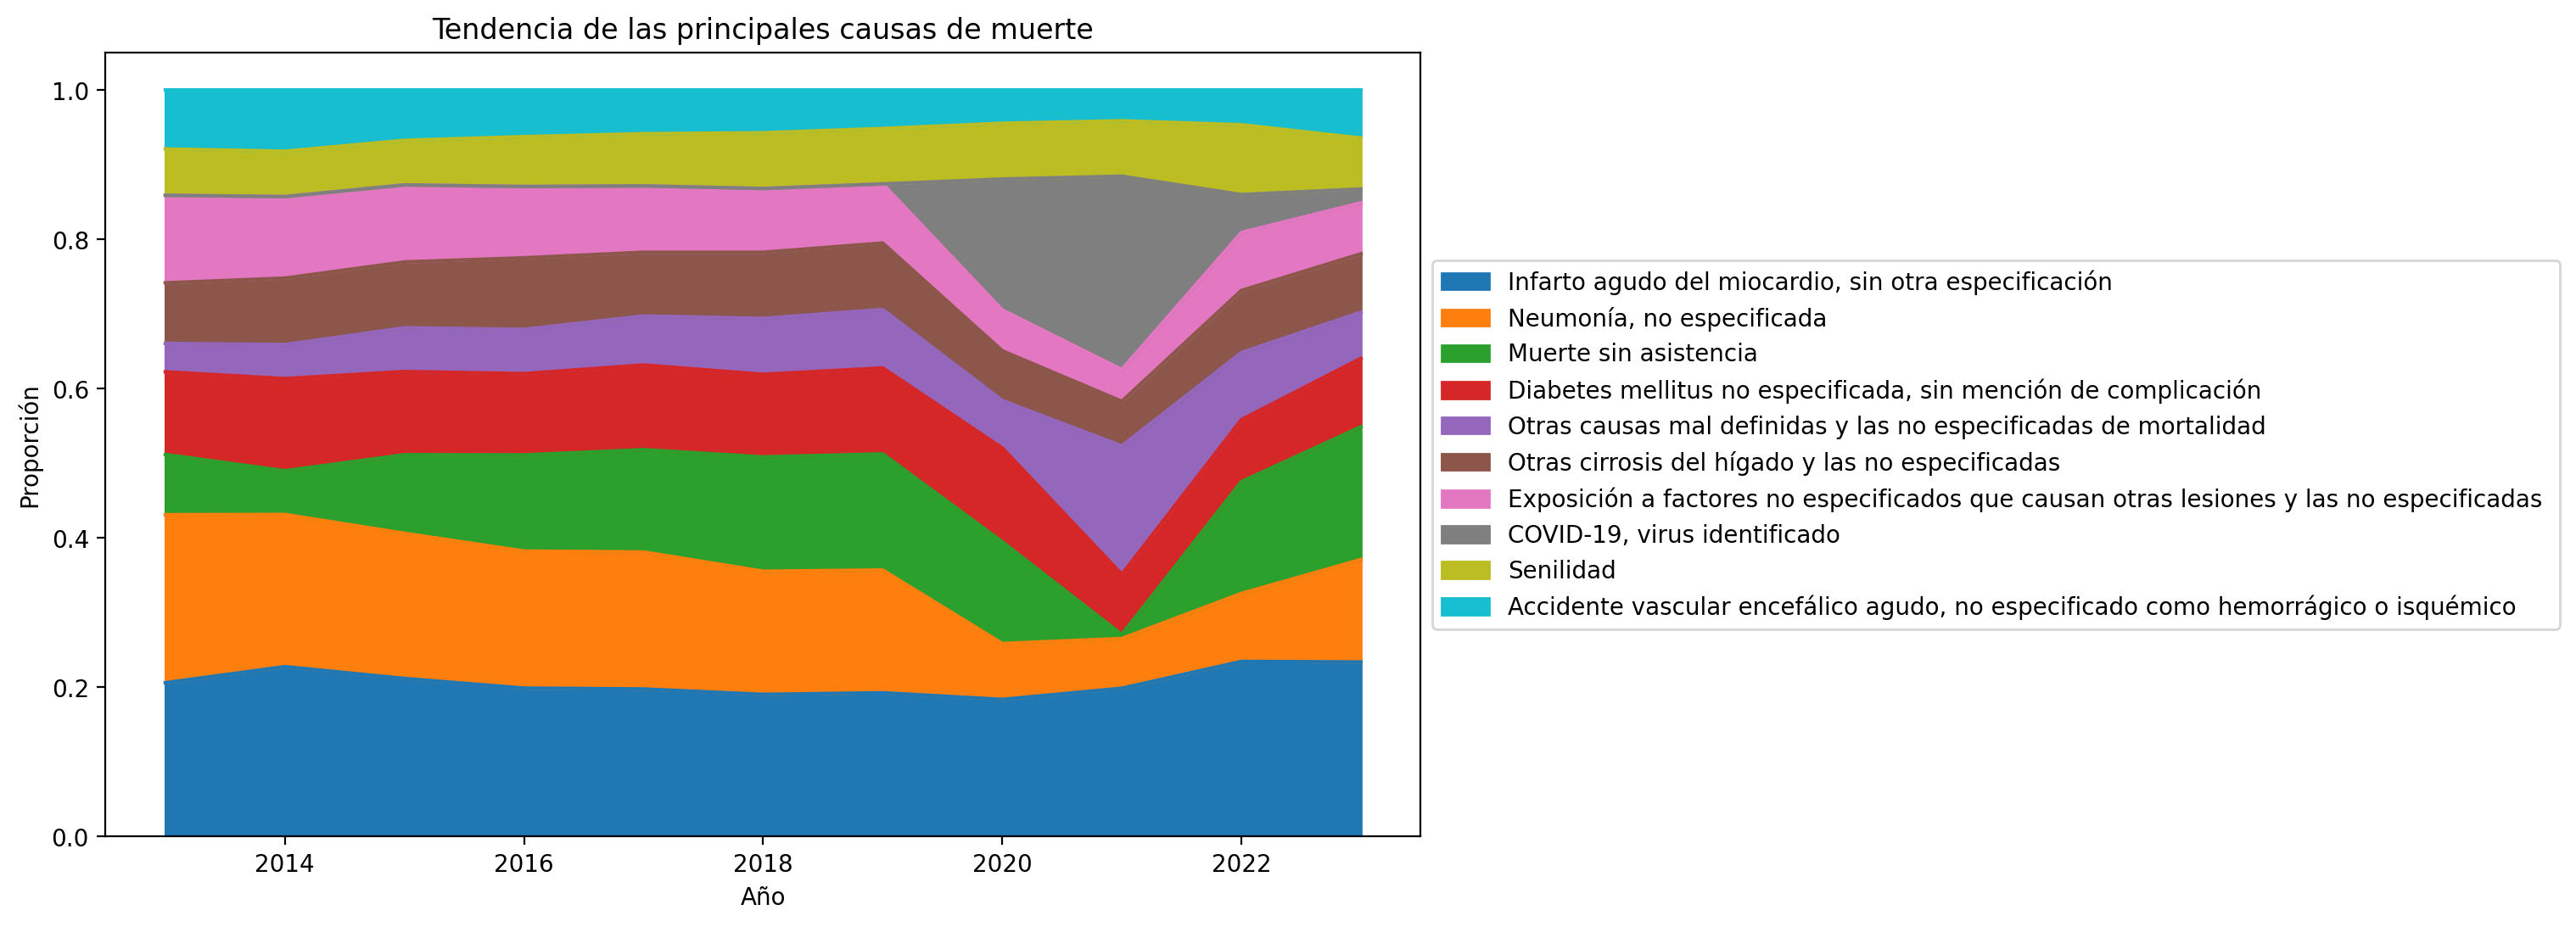

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the other table
cie = pd.read_csv('CIE.csv')

# ¿Cual ha sido la tendencia de las enfermedades más letales en los últimos 10 años?
df = defunciones.copy()

# Obtener las 10 causas de muerte más frecuentes
top_causas = df['causa'].value_counts().head(10).reset_index()
top_causas.columns = ['causa', 'count']

# Merge top_causas with cie to get the descriptions
top_causas = pd.merge(top_causas, cie, how='left', left_on='causa', right_on='codigo')

# Replace the 'causa' column with the 'descripcion' column
top_causas['causa'] = top_causas['descripcion']

# Drop the 'codigo' and 'descripcion' columns
top_causas = top_causas.drop(['codigo', 'descripcion'], axis=1)

print("Las 10 causas de muerte más frecuentes:")
print(top_causas)

# Replace 'causa' in df with 'descripcion' from cie
df = pd.merge(df, cie, how='left', left_on='causa', right_on='codigo')
df['causa'] = df['descripcion']
df = df.drop(['codigo', 'descripcion'], axis=1)

# Crear un DataFrame con las principales causas de muerte por año
df_tendencia = pd.crosstab(df['año_registrado'], df['causa'])
df_tendencia = df_tendencia[top_causas['causa'].values]

# Calcular la proporción de cada causa de muerte por año
df_tendencia_prop = df_tendencia.div(df_tendencia.sum(axis=1), axis=0)

print("Tendencia de las principales causas de muerte:")
print(df_tendencia_prop)

# Graficar la tendencia de las principales causas de muerte a lo largo de los años
plt.figure(dpi=300)
df_tendencia_prop.plot(kind='area', stacked=True, figsize=(10, 6))
plt.title('Tendencia de las principales causas de muerte')
plt.xlabel('Año')
plt.ylabel('Proporción')

# Move the legend to the right side of the plot
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

/var/folders/g7/1ym58dj93f13x5_nxk6zr72m0000gn/T/ipykernel_25660/2418429683.py:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  defunciones['sexo'] = defunciones['sexo'].replace('1.0', 'Hombre')
/var/folders/g7/1ym58dj93f13x5_nxk6zr72m0000gn/T/ipykernel_25660/2418429683.py:8: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  defunciones['sexo'] = defunciones['sexo'].replace('2.0', 'Mujer')


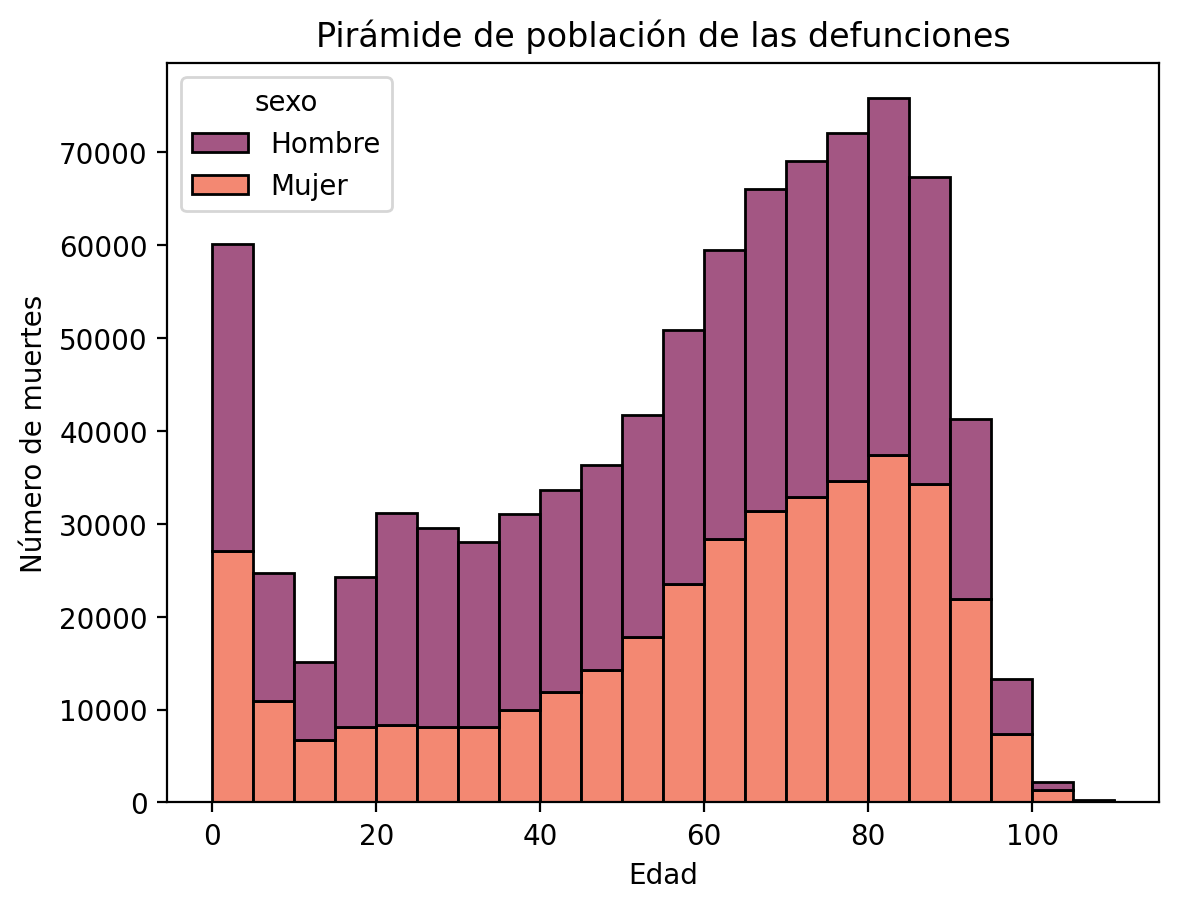

In [32]:
# Set the labels in Spanish
plt.xlabel('Edad')
plt.ylabel('Número de muertes')
plt.title('Pirámide de población de las defunciones')

defunciones['sexo'] = defunciones['sexo'].replace('1.0', 'Hombre')

defunciones['sexo'] = defunciones['sexo'].replace('2.0', 'Mujer')

# Plot the histogram
sns.histplot(data=defunciones[defunciones['edad'] <= 110], x='edad', hue='sexo', multiple='stack', bins=range(0, 111, 5), palette='rocket')

plt.show()


In [ ]:
# Get the top 5 causes of death
top_causas = defunciones['causa'].value_counts().head(5).index

# Filter the DataFrame to include only the top 5 causes of death
df_filtered = defunciones[defunciones['causa'].isin(top_causas)]

# Group by 'etnia', 'causa', and 'ocupacion' and count the number of occurrences
df_grouped = df_filtered.groupby(['etnia', 'causa', 'ocupacion']).size().unstack(level=0)

# Plot the DataFrame as a stacked bar chart
df_grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Top 5 Causes of Death by Occupation and Ethnicity')
plt.xlabel('Occupation and Cause of Death')
plt.ylabel('Count')
plt.show()

In [20]:
import pandas as pd 
import numpy as np 


# Define the categorical columns
cat_columns = ['sexo', 'etnia', 'periodo', 'etnia', 'departamento']

# Randomly select 1000 rows from the DataFrame
defunciones_sample = defunciones.sample(n=100000, random_state=42)

# Ensure the categorical columns are of type 'category'
for column in cat_columns:
    defunciones_sample[column] = defunciones_sample[column].astype('category')

# Get the indices of the categorical columns
categorical_indices = [defunciones_sample.columns.get_loc(col) for col in cat_columns]

kmodes = KModes(n_clusters=5, verbose=0, random_state=42)
clusters = kmodes.fit_predict(defunciones_sample.iloc[:, categorical_indices])

print(clusters)

[2 1 3 ... 2 0 1]


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 3643970.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 68332, cost: 3303907.0
Run 1, iteration: 2/100, moves: 25711, cost: 3303907.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 22726, cost: 3214737.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 43781, cost: 3113853.0


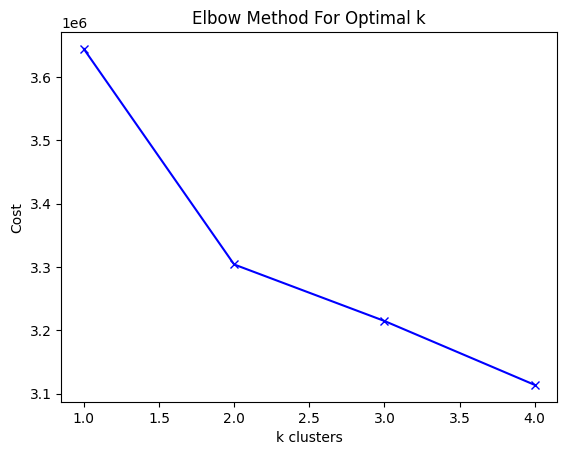

In [30]:
cat_columns = ['sexo', 'etnia', 'periodo', 'departamento','municipio','causa','ocupacion']
subset = defunciones[cat_columns]

cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(subset)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('k clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [6]:
from kmodes.kmodes import KModes
cat_columns = ['sexo', 'etnia', 'periodo', 'departamento','municipio','causa','ocupacion']
subset = defunciones[cat_columns]
k_optimo = 2
kmode_optimo = KModes(n_clusters=k_optimo, init="Cao", n_init=10, verbose=1)
clusters = kmode_optimo.fit_predict(subset)

defunciones_copy = defunciones.copy()

defunciones_copy['cluster'] = clusters

print(defunciones_copy.head())

display(defunciones_copy.groupby('cluster').size())

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 68332, cost: 3303907.0
Run 1, iteration: 2/100, moves: 25711, cost: 3303907.0
      departamento municipio sexo  año_registrado  edad periodo etnia  \
0             13.0      1327  1.0            2013    79     3.0   4.0   
50876         10.0      1002  1.0            2013    32     3.0   4.0   
50875          1.0      0110  1.0            2013    78     3.0   1.0   
50874          1.0      0105  1.0            2013    76     3.0   4.0   
50873          5.0      0507  1.0            2013    69     3.0   4.0   

      escolaridad ocupacion causa asistencia lugar  cluster  
0             1.0        61  R000        1.0   6.0        0  
50876         1.0        61  K297        5.0   6.0        0  
50875         1.0        61  K297        5.0   6.0        0  
50874         1.0        61  K297        5.0   

cluster
0    686440
1    191696
dtype: int64

In [7]:
display(defunciones_copy[defunciones_copy['cluster'] == 0].head())

departamento municipio sexo  año_registrado  edad periodo etnia  \
0             13.0      1327  1.0            2013    79     3.0   4.0   
50876         10.0      1002  1.0            2013    32     3.0   4.0   
50875          1.0      0110  1.0            2013    78     3.0   1.0   
50874          1.0      0105  1.0            2013    76     3.0   4.0   
50873          5.0      0507  1.0            2013    69     3.0   4.0   

      escolaridad ocupacion causa asistencia lugar  cluster  
0             1.0        61  R000        1.0   6.0        0  
50876         1.0        61  K297        5.0   6.0        0  
50875         1.0        61  K297        5.0   6.0        0  
50874         1.0        61  K297        5.0   6.0        0  
50873         1.0        61  K297        5.0   6.0        0

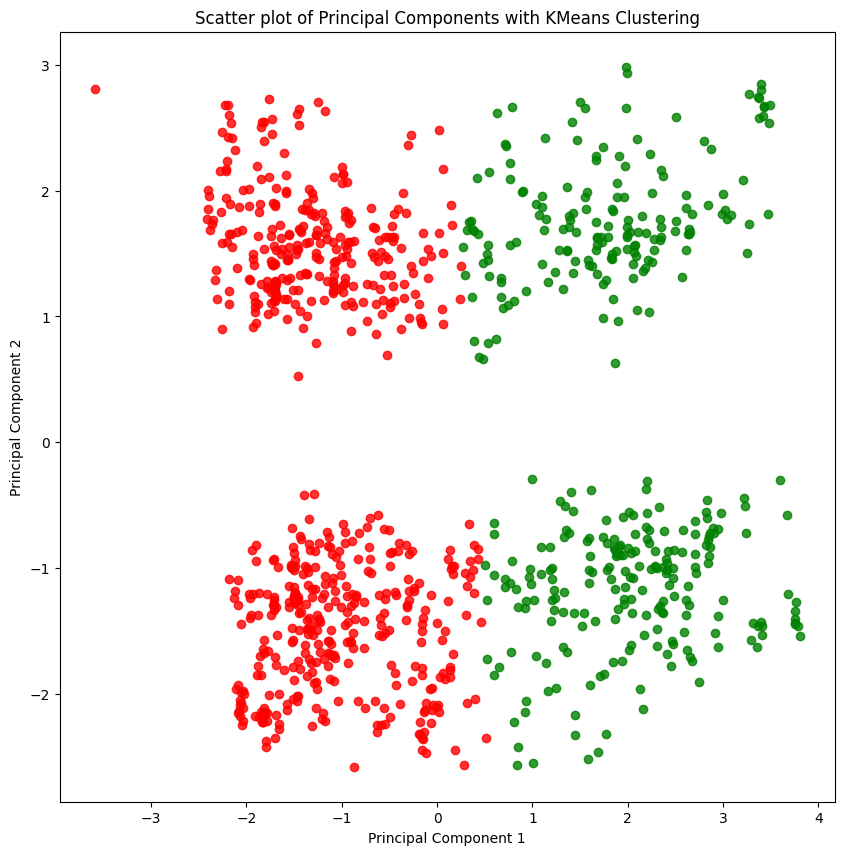

In [20]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

defunciones_sample = defunciones.sample(n=10000, random_state=22)

# only choose the following categorical: sexo, etnia, departamento, causa, and the numerical columns: edad, año_registrado
defunciones_sample = defunciones_sample[['sexo', 'etnia', 'departamento', 'causa', 'edad', 'año_registrado']]

# Assume that df_encoded is your one-hot encoded DataFrame
# One-hot encode the categorical variables
df_encoded = pd.get_dummies(defunciones_sample)

features = StandardScaler().fit_transform(df_encoded)

# Apply PCA and keep the first two principal components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features)

# Convert the principal components to a DataFrame
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])


# Apply KMeans clustering on the principal components
kmeans = KMeans(n_clusters=2, random_state=22).fit(principalDf)

# Add the cluster labels to the principalDf DataFrame
principalDf['cluster'] = kmeans.labels_


# Create a scatter plot of the two principal components
plt.figure(figsize=(10,10))
colors = ['r', 'g', 'b']
for color, i in zip(colors, [0, 1, 2]):
    plt.scatter(principalDf.loc[principalDf['cluster'] == i, 'principal component 1'], 
                principalDf.loc[principalDf['cluster'] == i, 'principal component 2'], 
                color=color, alpha=.8)
plt.title('Scatter plot of Principal Components with KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [2]:
print(defunciones.dtypes)

departamento      category
municipio         category
sexo              category
año_registrado       int64
edad                 int64
periodo           category
etnia             category
escolaridad       category
ocupacion         category
causa             category
asistencia        category
lugar             category
dtype: object


        año_registrado                                                         \
                 count         mean       std     min     25%     50%     75%   
cluster                                                                         
0.0             5144.0  2013.250000  0.445886  2013.0  2013.0  2013.0  2013.0   
1.0             6153.0  2013.262474  0.453835  2013.0  2013.0  2013.0  2014.0   

                   edad                                                        
            max   count       mean         std  min    25%   50%   75%    max  
cluster                                                                        
0.0      2015.0  5144.0  68.282465  116.320499  0.0  33.75  60.0  78.0  999.0  
1.0      2015.0  6153.0  68.596132  120.786816  0.0  32.00  59.0  78.0  999.0  


/var/folders/g7/1ym58dj93f13x5_nxk6zr72m0000gn/T/ipykernel_47666/4139111865.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = defunciones_sample.groupby(['cluster', var]).size().unstack(level=1).fillna(0)


<Figure size 1000x600 with 0 Axes>

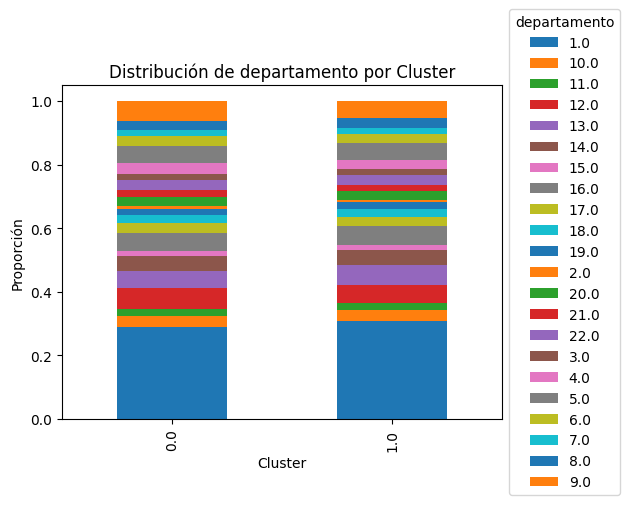

/var/folders/g7/1ym58dj93f13x5_nxk6zr72m0000gn/T/ipykernel_47666/4139111865.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = defunciones_sample.groupby(['cluster', var]).size().unstack(level=1).fillna(0)
/var/folders/g7/1ym58dj93f13x5_nxk6zr72m0000gn/T/ipykernel_47666/4139111865.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

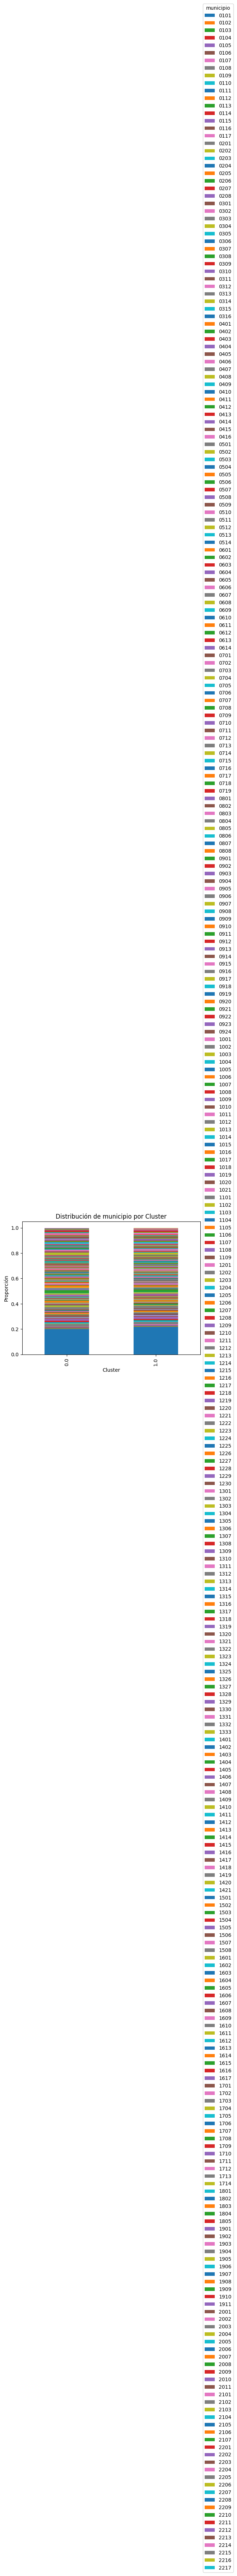

/var/folders/g7/1ym58dj93f13x5_nxk6zr72m0000gn/T/ipykernel_47666/4139111865.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = defunciones_sample.groupby(['cluster', var]).size().unstack(level=1).fillna(0)


<Figure size 1000x600 with 0 Axes>

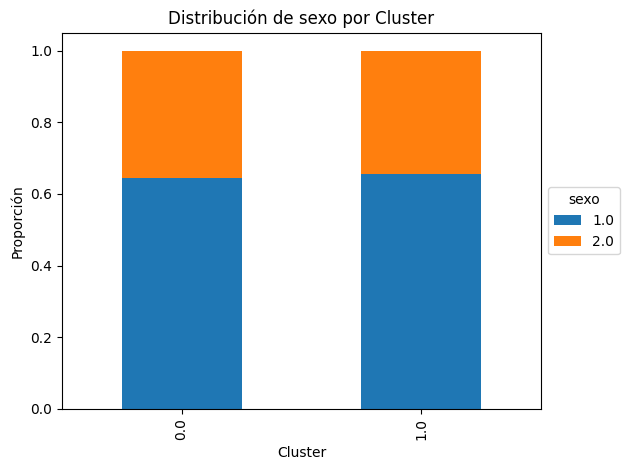

/var/folders/g7/1ym58dj93f13x5_nxk6zr72m0000gn/T/ipykernel_47666/4139111865.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = defunciones_sample.groupby(['cluster', var]).size().unstack(level=1).fillna(0)


<Figure size 1000x600 with 0 Axes>

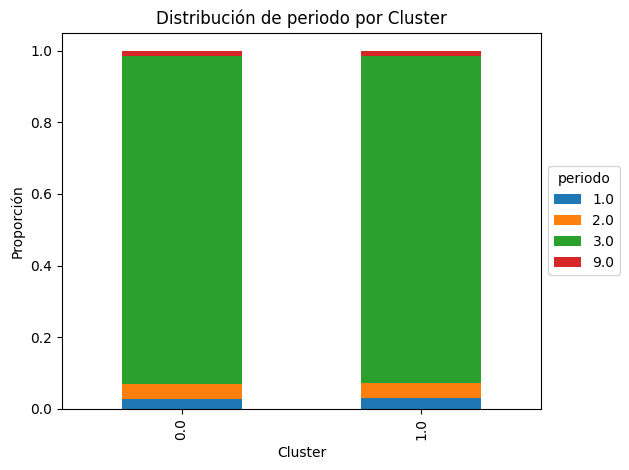

/var/folders/g7/1ym58dj93f13x5_nxk6zr72m0000gn/T/ipykernel_47666/4139111865.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = defunciones_sample.groupby(['cluster', var]).size().unstack(level=1).fillna(0)


<Figure size 1000x600 with 0 Axes>

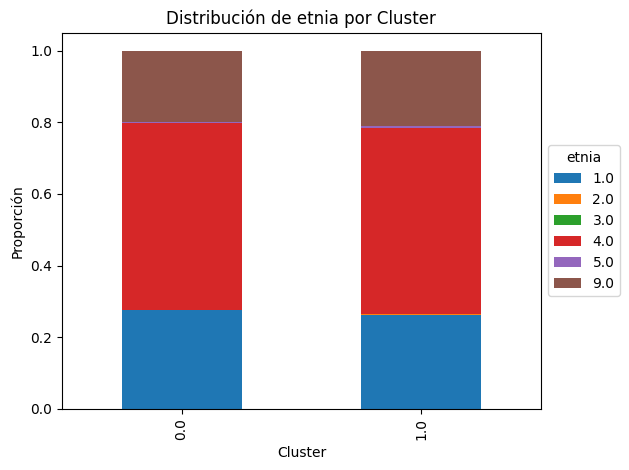

/var/folders/g7/1ym58dj93f13x5_nxk6zr72m0000gn/T/ipykernel_47666/4139111865.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = defunciones_sample.groupby(['cluster', var]).size().unstack(level=1).fillna(0)


<Figure size 1000x600 with 0 Axes>

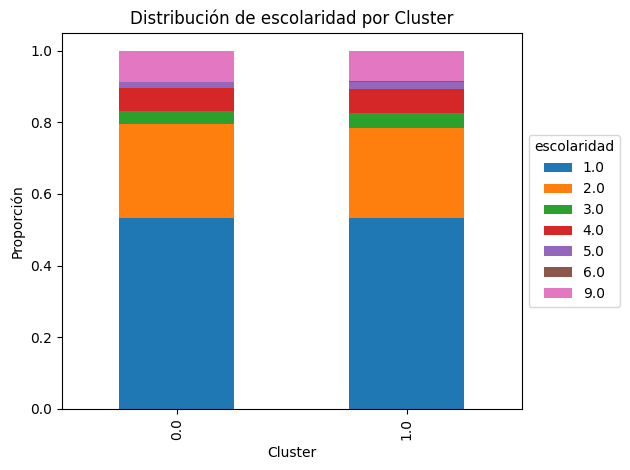

/var/folders/g7/1ym58dj93f13x5_nxk6zr72m0000gn/T/ipykernel_47666/4139111865.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = defunciones_sample.groupby(['cluster', var]).size().unstack(level=1).fillna(0)
/var/folders/g7/1ym58dj93f13x5_nxk6zr72m0000gn/T/ipykernel_47666/4139111865.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

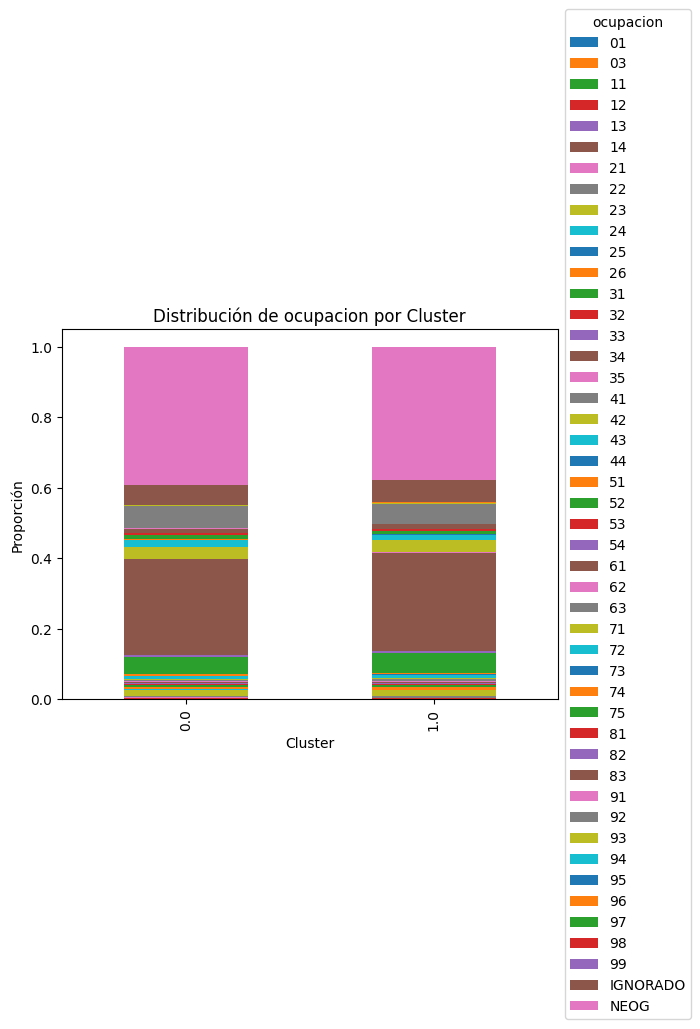

/var/folders/g7/1ym58dj93f13x5_nxk6zr72m0000gn/T/ipykernel_47666/4139111865.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = defunciones_sample.groupby(['cluster', var]).size().unstack(level=1).fillna(0)
/var/folders/g7/1ym58dj93f13x5_nxk6zr72m0000gn/T/ipykernel_47666/4139111865.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

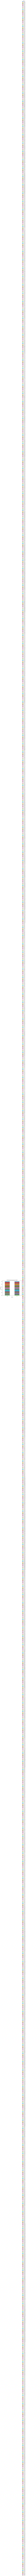

/var/folders/g7/1ym58dj93f13x5_nxk6zr72m0000gn/T/ipykernel_47666/4139111865.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = defunciones_sample.groupby(['cluster', var]).size().unstack(level=1).fillna(0)


<Figure size 1000x600 with 0 Axes>

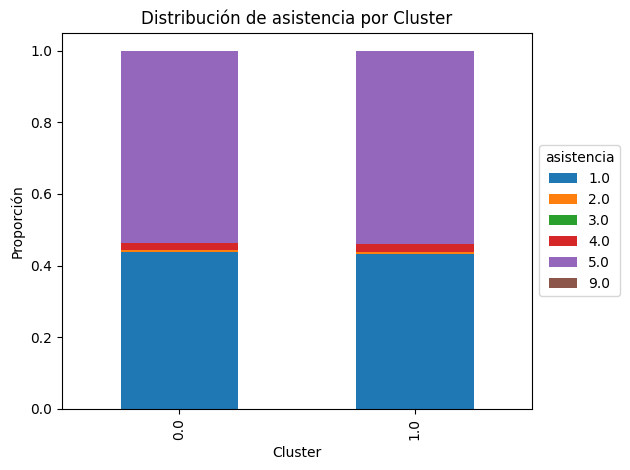

/var/folders/g7/1ym58dj93f13x5_nxk6zr72m0000gn/T/ipykernel_47666/4139111865.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = defunciones_sample.groupby(['cluster', var]).size().unstack(level=1).fillna(0)


<Figure size 1000x600 with 0 Axes>

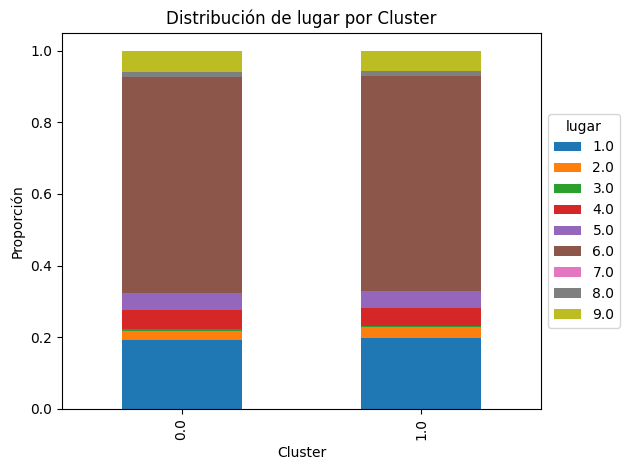

/var/folders/g7/1ym58dj93f13x5_nxk6zr72m0000gn/T/ipykernel_47666/4139111865.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(defunciones_sample.loc[defunciones_sample['cluster'] == i, var], shade=True, color=color, label=f"Cluster {i}")
/var/folders/g7/1ym58dj93f13x5_nxk6zr72m0000gn/T/ipykernel_47666/4139111865.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(defunciones_sample.loc[defunciones_sample['cluster'] == i, var], shade=True, color=color, label=f"Cluster {i}")
/var/folders/g7/1ym58dj93f13x5_nxk6zr72m0000gn/T/ipykernel_47666/4139111865.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(defunciones_sampl

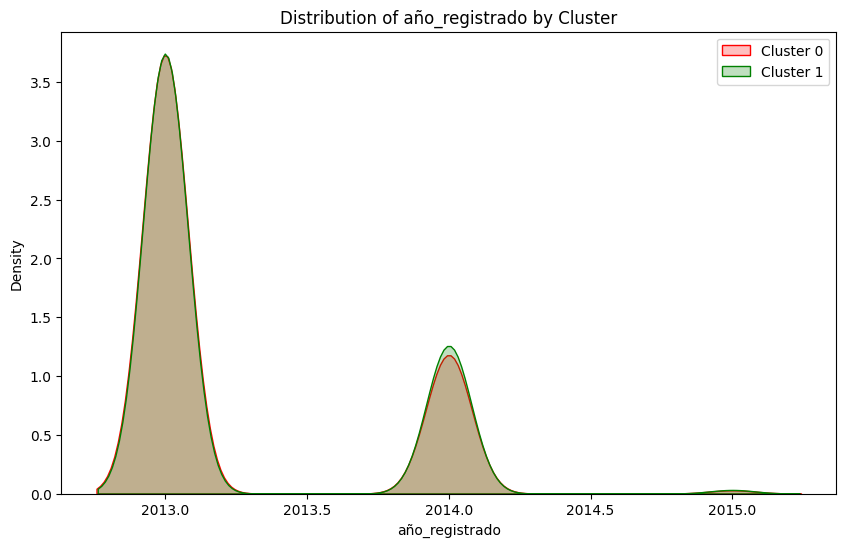

/var/folders/g7/1ym58dj93f13x5_nxk6zr72m0000gn/T/ipykernel_47666/4139111865.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(defunciones_sample.loc[defunciones_sample['cluster'] == i, var], shade=True, color=color, label=f"Cluster {i}")
/var/folders/g7/1ym58dj93f13x5_nxk6zr72m0000gn/T/ipykernel_47666/4139111865.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(defunciones_sample.loc[defunciones_sample['cluster'] == i, var], shade=True, color=color, label=f"Cluster {i}")
/var/folders/g7/1ym58dj93f13x5_nxk6zr72m0000gn/T/ipykernel_47666/4139111865.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(defunciones_sampl

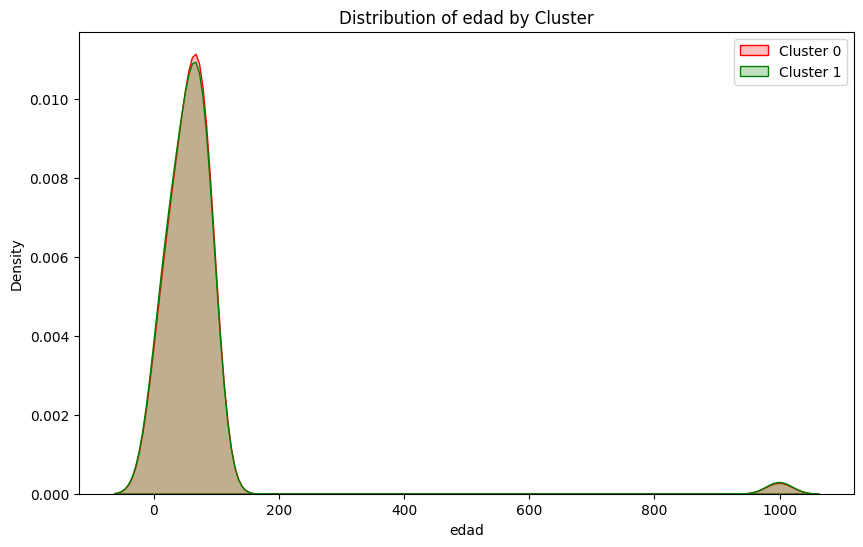

In [19]:
defunciones_sample['cluster'] = principalDf['cluster']

cluster_stats = defunciones_sample.groupby('cluster').describe()
print(cluster_stats)

categorical_vars = ['departamento', 'municipio', 'sexo', 'periodo', 'etnia', 'escolaridad', 'ocupacion', 'causa', 'asistencia', 'lugar']

for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    df_plot = defunciones_sample.groupby(['cluster', var]).size().unstack(level=1).fillna(0)
    df_plot = df_plot.apply(lambda x: x / x.sum(), axis=1)  # Normalizar los valores
    df_plot.plot(kind='bar', stacked=True)
    plt.title(f"Distribución de {var} por Cluster")
    plt.xlabel("Cluster")
    plt.ylabel("Proporción")
    plt.legend(title=var, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.show()

numeric_vars = ['año_registrado', 'edad']

for var in numeric_vars:
    plt.figure(figsize=(10, 6))
    for color, i in zip(colors, [0, 1, 2]):
        sns.kdeplot(defunciones_sample.loc[defunciones_sample['cluster'] == i, var], shade=True, color=color, label=f"Cluster {i}")
    plt.title(f"Distribution of {var} by Cluster")
    plt.xlabel(var)
    plt.ylabel("Density")
    plt.legend()
    plt.show()